In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "../data/adult.data"
test_path = "../data/adult.test"

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_per_week', 'native_country', 'wage_class']

In [4]:
train_data_df = pd.read_csv(train_path, names=col_labels)
test_data_df = pd.read_csv(test_path, names=col_labels)

In [5]:
test_data_df = test_data_df[1:].reset_index(drop=True)

In [6]:
train_data_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_data_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


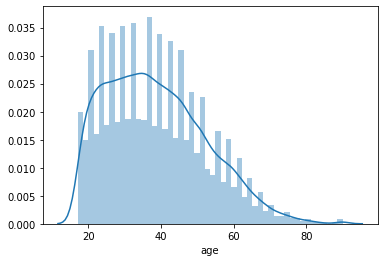

In [8]:
sns.distplot(train_data_df['age'])

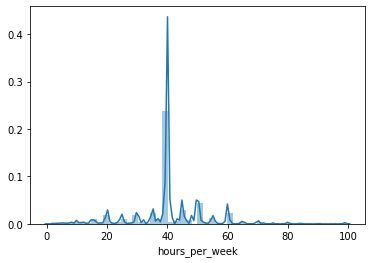

In [9]:
sns.distplot(train_data_df['hours_per_week'])

In [10]:
train_data_df = train_data_df.replace(' ?', np.nan)
test_data_df = test_data_df.replace(' ?', np.nan)

In [11]:
print(train_data_df.info())
print(test_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns

In [12]:
dataset = pd.concat([train_data_df,test_data_df],axis=0)

In [13]:
dataset['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [14]:
dataset['wage_class'] = dataset.wage_class.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'})

In [15]:
dataset['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
cate_features = []
for feature in dataset.columns:
    if dataset[feature].dtype == 'object':
        dataset[feature] = pd.Categorical(dataset[feature]).codes
        cate_features.append(feature)
cate_features.remove('wage_class')

In [17]:
features = dataset.drop('wage_class',axis=1)
labels = dataset['wage_class']

In [18]:
train_features, test_features = features[:train_data_df.shape[0]], features[train_data_df.shape[0]:]
train_labels, test_labels = labels[:train_data_df.shape[0]], labels[train_data_df.shape[0]:]

In [19]:
import lightgbm as lgb

In [20]:
model = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=15,max_depth=4,learning_rate=0.01)

In [21]:
model.fit(train_features,train_labels,categorical_feature=cate_features)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=15, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
training_score = accuracy_score(model.predict(train_features),train_labels)
testing_score = accuracy_score(model.predict(test_features),test_labels)
print("Training accuracy score: %.5f, test accuracy score: %.5f" % (training_score,testing_score))

Training accuracy score: 0.84288, test accuracy score: 0.81733


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torch.nn.init as init
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

In [24]:
train_data_df = train_data_df.dropna()
test_data_df = test_data_df.dropna()

In [25]:
dataset = pd.concat([train_data_df,test_data_df],axis=0)
dataset['wage_class'] = dataset.wage_class.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'})
dataset['wage_class'] = pd.Categorical(dataset['wage_class']).codes

In [26]:
for cate_col in cate_features:
    tmp = pd.get_dummies(dataset[cate_col])
    dataset.drop(cate_col, axis=1,inplace=True)
    dataset = pd.concat([dataset,tmp], axis=1)

In [27]:
class Model(nn.Module):
    def __init__(self,feature_num):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(feature_num, 2*feature_num, bias=True)
        self.fc2 = nn.Linear(2*feature_num, 2*feature_num, bias=True)
        self.fc3 = nn.Linear(2*feature_num, 2, bias=True)
    def forward(self, x):
        x = F.softmax(self.fc1(x))
        x = F.dropout(x, p=0.5)
        x = F.softmax(self.fc2(x))
        x = F.dropout(x, p=0.5)
        x = F.sigmoid(self.fc3(x))
        return x

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight, gain=1)
                print(m.weight)

In [28]:
train_set = dataset[:train_data_df.shape[0]]
test_set = dataset[train_data_df.shape[0]:]
train_features, train_labels = train_set.drop('wage_class', axis=1), train_set['wage_class']
test_features, test_labels = test_set.drop('wage_class', axis=1), test_set['wage_class']

In [30]:
torch_dataset = TensorDataset(torch.FloatTensor(train_features.values), torch.LongTensor(train_labels.tolist()))
test_features_tensor = torch.FloatTensor(test_features.values)

train_loader = DataLoader( 
        dataset=torch_dataset,
        batch_size=128,
        shuffle=True,
    )

In [31]:
model = Model(train_features.shape[1])
cross_entropy_loss = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [32]:
for epoch in tqdm(range(20)):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        pred = model(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        optimizer.zero_grad()
        loss.backward()         # backward
        optimizer.step()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:43<00:00,  2.16s/it]


In [33]:
train_predict = model(torch.FloatTensor(train_features.values)).data.numpy()
test_predict = model(torch.FloatTensor(test_features.values)).data.numpy()
training_score = accuracy_score(np.argmax(train_predict, axis=1),train_labels)
testing_score = accuracy_score(np.argmax(test_predict, axis=1),test_labels)

In [34]:
print("Training accuracy score: %.5f, test accuracy score: %.5f" % (training_score,testing_score))

Training accuracy score: 0.75108, test accuracy score: 0.75432
